# Thyroid Diseases

Kajetan jankowski

## 01. Wstęp

Wybrałem baze danych posiadająca informacje o chorobach tarczycy. Baza danych posiada 8795 wierszu oraz 28 kulumn, zawiera mniedzy informacje o wieku, płóci,czy pacjęt bierze leki, oraz kolumne "target" - podająca wynik. Jest 8 diagnoze : 
       
    negative
        
    hypothyroid conditions:
    
    binding protein:
    
    general health:
    
    replacement therapy:
    
    antithyroid treatment:
    
    miscellaneous:


## 02. Bazy danych 

Stworzyłem 2 bazy danych, gdzie pierwsza posiada 69% zdrowych - "Negative" do 31% chorych i posiada ona 7720 wierszy oraz 29 kolumn. Natomiast druga baza danych posiada mniej wierszy i jest to 4886 az stosunek 50% zdrowych (negative) - 50% chorych 

## 03. Podziały

In [21]:
all_inputs = data.drop('target',axis=1).values
all_classes = data['target'].values

all_inputs2 = data2.drop('target', axis=1).values
all_classes2 = data2['target'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.6, random_state=278892)
(train_inputs2, test_inputs2, train_classes2, test_classes2) = train_test_split(all_inputs2, all_classes2, train_size=0.6, random_state=278892)


W kolumnie 'target' znajdują się diagnozy i służa one jako class/label. Dziele moje dane na zestaw treningowy(60%) oraz testywy(40%)

## 04. Klasyfikacja

### 01. DecisionTreeClassifier

Dla pierwszej bazy danych stworzyłem taki model który wskazuje 93.7 % 

In [8]:

dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)
print(dtc.score(test_inputs, test_classes))

0.9371761658031088


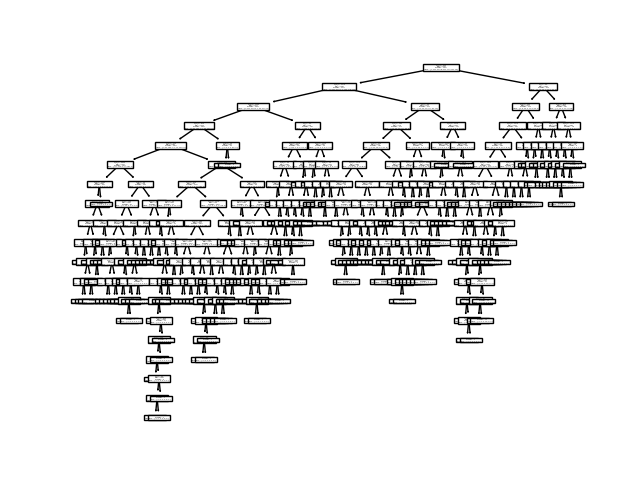

Wizualne przedstawienie drzewa 

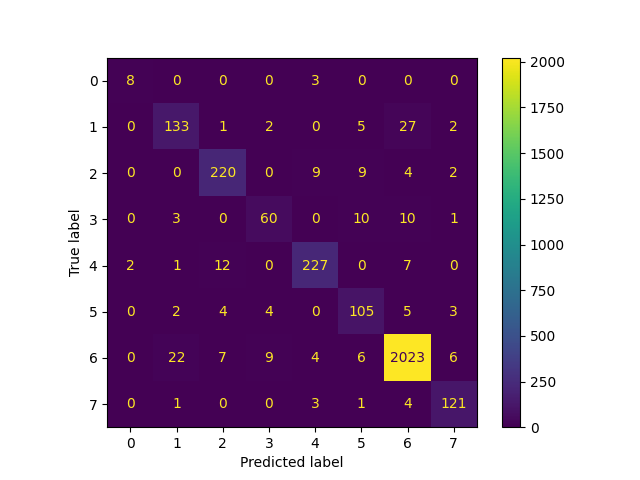

Macierz błędy

Model dla bazy danych 2 

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)
print(dtc.score(test_inputs, test_classes))

0.9381476683937824


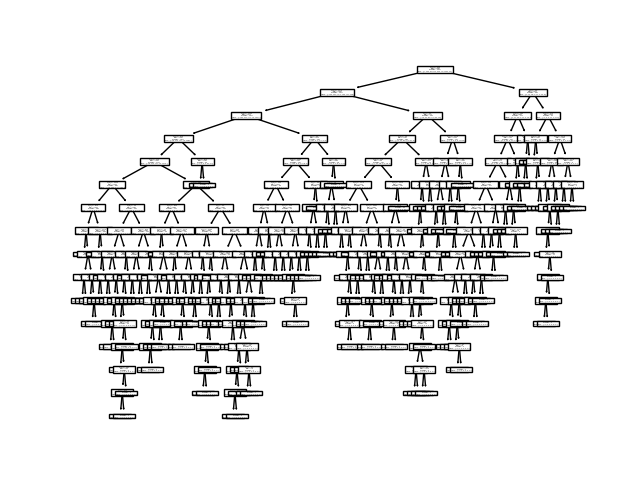
Wizualne przedstawienie drzewa



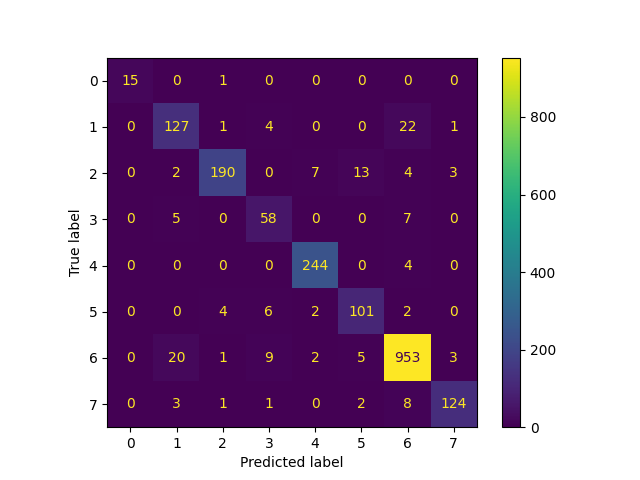

macierz błędu

Przeprowadziłem jeszcze w wersji mniejszez przyciętymi gałęziami - max_depth=5

0.8516839378238342


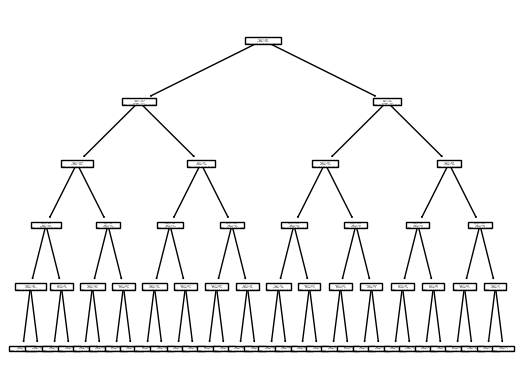

In [16]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)
print(dtc.score(test_inputs, test_classes))
tree.plot_tree(dtc)
plt.show()

0.8061381074168797


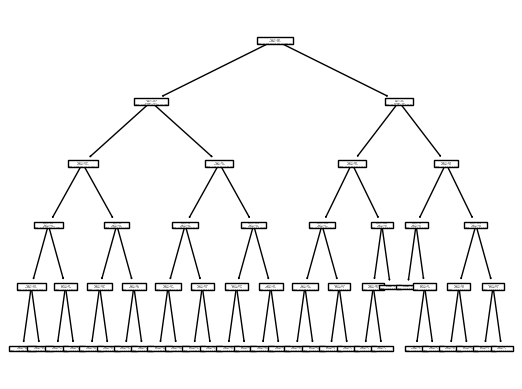

In [17]:

dtc2 = DecisionTreeClassifier(max_depth=5)
dtc2.fit(train_inputs2, train_classes2)
dtc2.score(test_inputs2, test_classes2)
print(dtc2.score(test_inputs2, test_classes2))
tree.plot_tree(dtc2)
plt.show()

 #### DecisionTreeClassifier - Analiza

Dla moich baz danych wyniki są bardzo podobne oby dwa modele osiągneły wyniki około 94% skuteczności. Jeśli chodzi o zmniejszone drzewo skuteczność oczywiście znalała data-85% data2-80%

### 02. NaiveBayes

Dla klasyfikatora Naive Bayes zakładam, że moje dane nie są dobrym wyborem i skuteczność nie bedzie duża, gdyż ten algorytm zakłada że dane są niezależne. W moim przypadku są bardzo zalezne

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

model = GaussianNB()

model.fit(train_inputs, train_classes)

y_pred = model.predict(test_inputs)
accuray = accuracy_score(y_pred, test_classes)
f1 = f1_score(y_pred, test_classes, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.1133419689119171
F1 Score: 0.1323108433723468


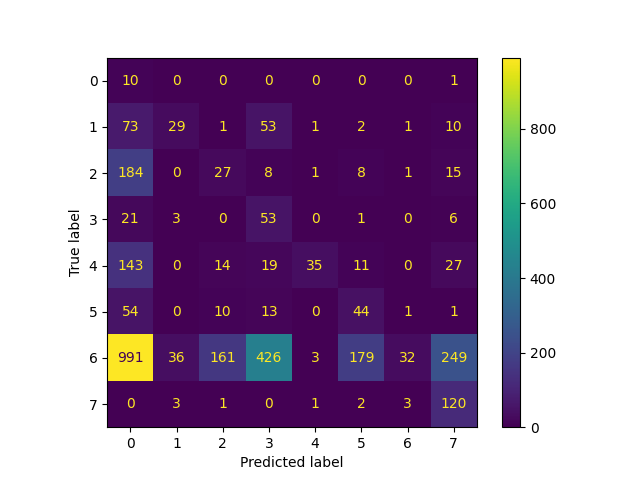
Macierz błędu

In [24]:
model = GaussianNB()

model.fit(train_inputs2, train_classes2)

y_pred = model.predict(test_inputs2)
accuray = accuracy_score(y_pred, test_classes2)
f1 = f1_score(y_pred, test_classes2, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.27263427109974425
F1 Score: 0.2918264598342539


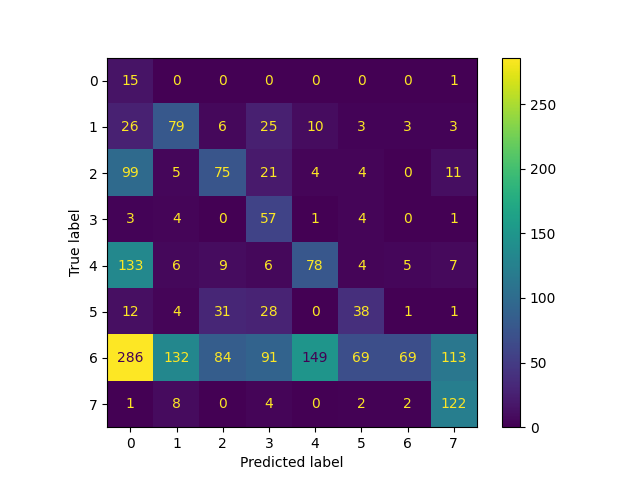
macierz blędu

#### NaiveBayes-Analiza

Tak jak napisałem wcześniej ten klasyfikaor nie jest dobry dla moich danych i daje marne wyniki

### 03. K-Najbliższych Sąsiadów

Przyjołem 3,5 oraz 11 jako "k" i dla każdego z nich odpalilem algorytm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np


k_range=[3,5,11]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_inputs,train_classes)
    y_pred=knn.predict(test_inputs)
    print(i , " - "  ,metrics.accuracy_score(test_classes,y_pred)*100)
 
   

3  -  75.42098445595855
5  -  77.04015544041451
11  -  76.97538860103627


Macierze błędu w kolejności wyników 3 , 5 ,11 
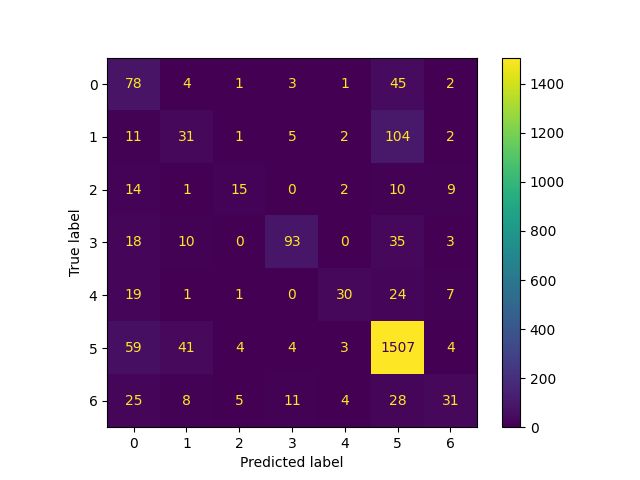




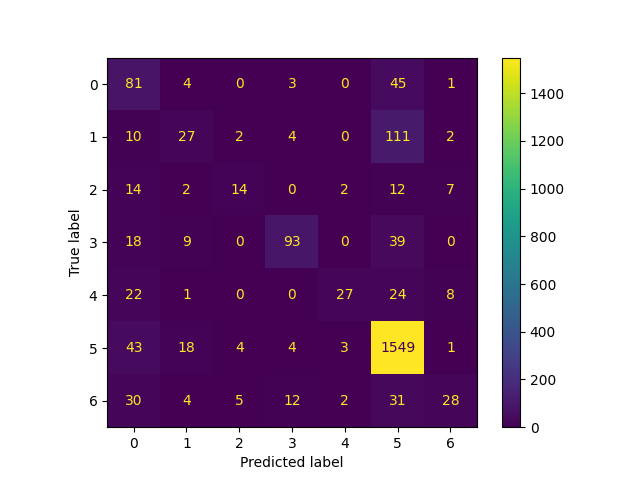

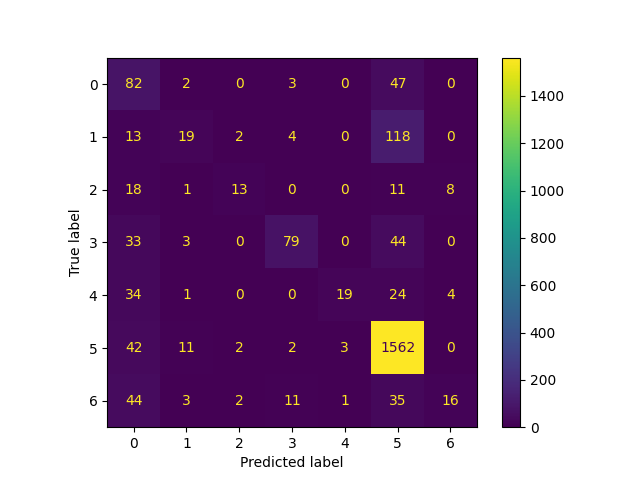

In [37]:
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_inputs2,train_classes2)
    y_pred=knn.predict(test_inputs2)
    print(i , " - "  ,metrics.accuracy_score(test_classes2,y_pred)*100)

3  -  65.67774936061382
5  -  67.97953964194373
11  -  67.05882352941175


Macierze błędu w kolejności wyników 3 , 5 ,11 
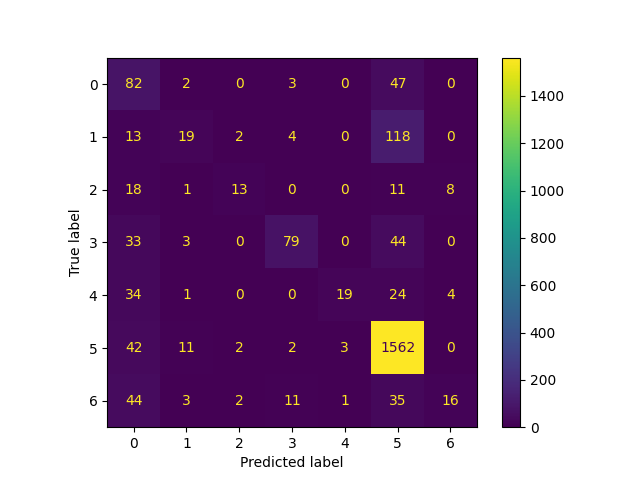

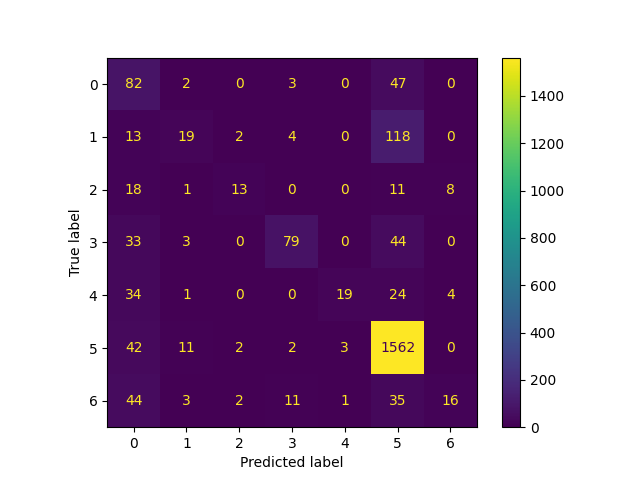

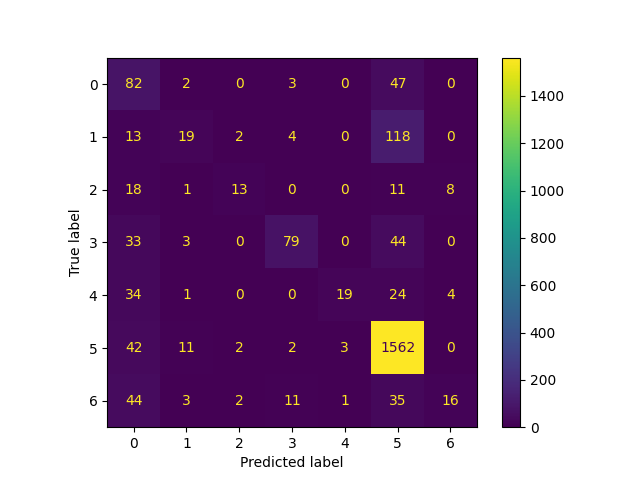

#### K-Najbliższych Sąsiadów- Analiza

Widzimy, że dla moich danych - data czyli danych z wieksza różnicą chorych a zdrowych , skuteczność jest wieksza od data2 o około 10%

### 04. Sieć neuronowa 

In [ ]:
from sklearn import preprocessing
from sklearn.discriminant_analysis import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Flatten
le = preprocessing.LabelEncoder()

data['target'] = le.fit_transform(data['target'])
data2['target'] = le.fit_transform(data2['target'])

all_inputs = data.drop('target',axis=1).values
all_classes = data['target'].values

all_inputs2 = data2.drop('target', axis=1).values

all_classes2 = data2['target'].values


(train_data, test_data, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.6, random_state=278892)

scaler = StandardScaler()
scaler.fit(train_inputs)
train_data = scaler.transform(train_inputs)
test_data = scaler.transform(test_inputs)


model = Sequential()
model.add(Flatten())
model.add(Dense(3, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_data, train_classes, epochs=150, batch_size=16, validation_data=(test_data, test_classes))
_, accuracy = model.evaluate(test_data, test_classes)
print('Accuracy: %.2f' % (accuracy*100))